# Machine Learning de Classificação

## Problemas multiclasse

Fazendo o tratamento inicial dos dados, escalonando os atritbutos, mas mantendo a faixa de qualidade do vinho como original

In [1]:
import pandas as pd
dados = pd.read_excel('dados_vinho_original.xlsx')
dados = pd.get_dummies(dados,columns=['type'],dtype = 'int')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
lista_colunas = dados.columns.tolist()
lista_colunas.remove('quality')
lista_colunas.append('quality')
dados = dados[lista_colunas]
atributos = dados.iloc[:,:-1]
atributos = pd.DataFrame(scaler.fit_transform(atributos),columns=atributos.columns)
dados_tratados = atributos.copy()
dados_tratados['quality'] = dados.quality

In [2]:
dados_tratados

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,type_red,type_white,quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,1.0,0.0,5
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,1.0,0.0,5
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,1.0,0.0,5
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,1.0,0.0,6
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,1.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.0,1.0,6
6493,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.0,1.0,5
6494,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.0,1.0,6
6495,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,0.0,1.0,7


In [3]:
dados_tratados.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

Separação de dados em x, y e, depois, em bases de treino e teste

In [4]:
x = dados_tratados.iloc[:,:-1].values
y = dados_tratados.iloc[:,-1].values

In [5]:
x

array([[0.29752066, 0.41333333, 0.        , ..., 0.20289855, 1.        ,
        0.        ],
       [0.33057851, 0.53333333, 0.        , ..., 0.26086957, 1.        ,
        0.        ],
       [0.33057851, 0.45333333, 0.02409639, ..., 0.26086957, 1.        ,
        0.        ],
       ...,
       [0.2231405 , 0.10666667, 0.11445783, ..., 0.20289855, 0.        ,
        1.        ],
       [0.14049587, 0.14      , 0.18072289, ..., 0.69565217, 0.        ,
        1.        ],
       [0.18181818, 0.08666667, 0.22891566, ..., 0.55072464, 0.        ,
        1.        ]])

In [6]:
y

array([5, 5, 5, ..., 6, 7, 6], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,train_size=0.8,random_state=42)

Definindo funções de anlálise

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred, nome, classes=None):
    cmap = sns.cubehelix_palette(as_cmap=True)
    
    # Se classes não forem fornecidas, obter classes únicas a partir de y_true e y_pred
    if classes is None:
        classes = np.unique(np.concatenate([y_true, y_pred]))
    
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm, cmap=cmap, cbar=False, annot=False, fmt='g', linewidths=.5)

    # Ajustar a cor e a posição das anotações para cada célula
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            text_color = 'white' if cm[i, j] > (0.5 * cm.max()) else 'black'
            ax.text(j + 0.5, i + 0.5, str(cm[i, j]), 
                    horizontalalignment='center', 
                    verticalalignment='center', 
                    color=text_color)
    
    plt.title(nome)
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.xticks(ticks=np.arange(len(classes)) + 0.5, labels=classes)
    plt.yticks(ticks=np.arange(len(classes)) + 0.5, labels=classes)
    plt.tight_layout()
    plt.show()
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import pandas as pd
resultados = pd.DataFrame(columns=['modelo','accuracy'])
def add_result(resultados,modelo,y_real,y_previsto):
    acc = accuracy_score(y_real,y_previsto)
    resultados.loc[resultados.shape[0]]=[modelo,acc]
    return resultados

### Naive Bayes

[8 5 7 6 6 6 5 6 5 7] [6 5 9 9 5 6 6 9 5 9]


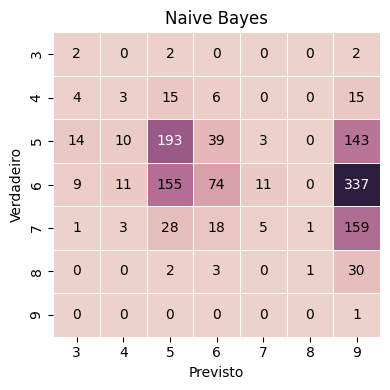

,modelo,accuracy
0,Naive Bayes,0.214615


In [9]:
nome = 'Naive Bayes'
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(x_treino,y_treino)
y_previsto = modelo.predict(x_teste)
print(y_teste[:10],y_previsto[:10])
plot_confusion_matrix(y_teste,y_previsto,nome)
resultados = add_result(resultados,nome,y_teste,y_previsto)
resultados

### DecisionTree

[8 5 7 6 6 6 5 6 5 7] [7 5 7 6 5 6 5 6 5 7]


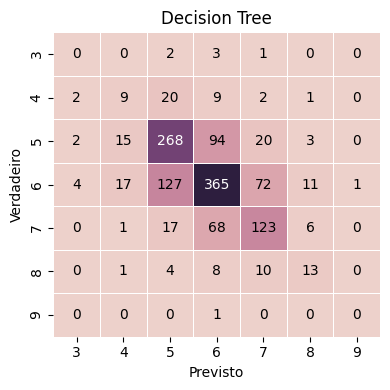

,modelo,accuracy
0,Naive Bayes,0.214615
1,Decision Tree,0.598462


In [10]:
nome = 'Decision Tree'
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(x_treino,y_treino)
y_previsto = modelo.predict(x_teste)
print(y_teste[:10],y_previsto[:10])
plot_confusion_matrix(y_teste,y_previsto,nome)
resultados = add_result(resultados,nome,y_teste,y_previsto)
resultados

### Random Forest

[8 5 7 6 6 6 5 6 5 7] [6 5 7 5 5 6 6 6 5 7]


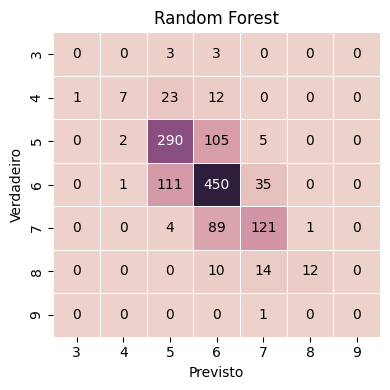

,modelo,accuracy
0,Naive Bayes,0.214615
1,Decision Tree,0.598462
2,Random Forest,0.676923


In [11]:
nome = 'Random Forest'
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier()
modelo.fit(x_treino,y_treino)
y_previsto = modelo.predict(x_teste)
print(y_teste[:10],y_previsto[:10])
plot_confusion_matrix(y_teste,y_previsto,nome)
resultados = add_result(resultados,nome,y_teste,y_previsto)
resultados


[8 5 7 6 6 6 5 6 5 7] [6 5 7 5 5 6 5 6 5 6]


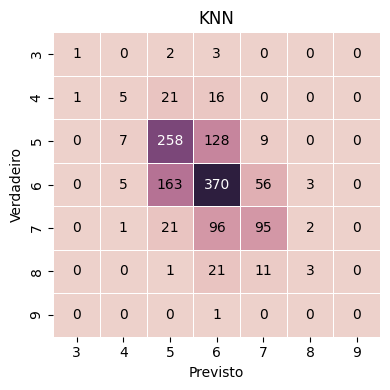

,modelo,accuracy
0,Naive Bayes,0.214615
1,Decision Tree,0.598462
2,Random Forest,0.676923
3,KNN,0.563077


In [12]:
nome = 'KNN'
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier()
modelo.fit(x_treino,y_treino)
y_previsto = modelo.predict(x_teste)
print(y_teste[:10],y_previsto[:10])
plot_confusion_matrix(y_teste,y_previsto,nome)
resultados = add_result(resultados,nome,y_teste,y_previsto)
resultados

### Support Vector Machine

[8 5 7 6 6 6 5 6 5 7] [6 5 6 6 5 6 6 6 5 6]


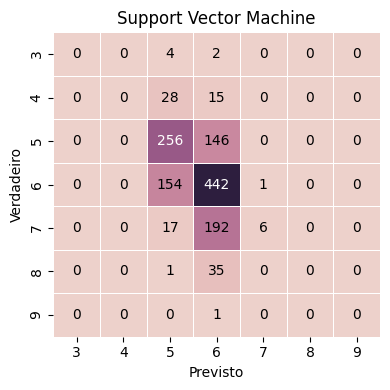

,modelo,accuracy
0,Naive Bayes,0.214615
1,Decision Tree,0.598462
2,Random Forest,0.676923
3,KNN,0.563077
4,Support Vector Machine,0.541538


In [13]:
nome = 'Support Vector Machine'
from sklearn.svm import SVC
modelo = SVC()
modelo.fit(x_treino,y_treino)
y_previsto = modelo.predict(x_teste)
print(y_teste[:10],y_previsto[:10])
plot_confusion_matrix(y_teste,y_previsto,nome)
resultados = add_result(resultados,nome,y_teste,y_previsto)
resultados

### Regressão Logística

d:\Drive Unesc\Meu Drive\2023-2\5af - Ciência de Dados\Notebooks\Unidade 3\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[8 5 7 6 6 6 5 6 5 7] [6 5 6 5 5 6 6 6 5 6]


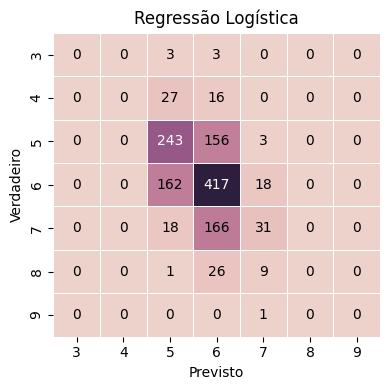

,modelo,accuracy
0,Naive Bayes,0.214615
1,Decision Tree,0.598462
2,Random Forest,0.676923
3,KNN,0.563077
4,Support Vector Machine,0.541538
5,Regressão Logística,0.531538


In [14]:
nome = 'Regressão Logística'
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()
modelo.fit(x_treino,y_treino)
y_previsto = modelo.predict(x_teste)
print(y_teste[:10],y_previsto[:10])
plot_confusion_matrix(y_teste,y_previsto,nome)
resultados = add_result(resultados,nome,y_teste,y_previsto)
resultados

### Rede neural artificial

d:\Drive Unesc\Meu Drive\2023-2\5af - Ciência de Dados\Notebooks\Unidade 3\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[8 5 7 6 6 6 5 6 5 7] [6 5 7 5 5 6 6 6 5 6]


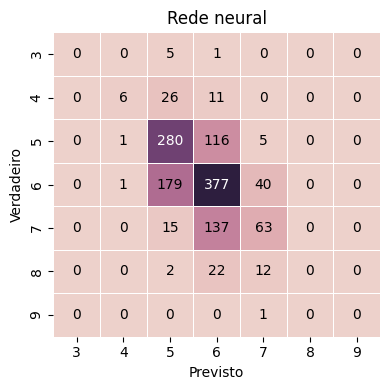

,modelo,accuracy
0,Naive Bayes,0.214615
1,Decision Tree,0.598462
2,Random Forest,0.676923
3,KNN,0.563077
4,Support Vector Machine,0.541538
5,Regressão Logística,0.531538
6,Rede neural,0.558462


In [15]:
nome = 'Rede neural'
from sklearn.neural_network import MLPClassifier
modelo = MLPClassifier()
modelo.fit(x_treino,y_treino)
y_previsto = modelo.predict(x_teste)
print(y_teste[:10],y_previsto[:10])
plot_confusion_matrix(y_teste,y_previsto,nome)
resultados = add_result(resultados,nome,y_teste,y_previsto)
resultados

## Salvando modelo

In [16]:
import joblib
modelo_final = RandomForestClassifier()
modelo_final.fit(x,y)
arquivo = 'modelo_final.pkl'
joblib.dump(modelo_final, arquivo)

['modelo_final.pkl']

## Carregando modelo

In [17]:
modelo_carregado = joblib.load(arquivo)
y_previsto = modelo_carregado.predict(x_teste)
y_previsto

array([8, 5, 7, ..., 7, 6, 7], dtype=int64)